In [343]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator


In [344]:
# Initial Parameters

#Solver Parameters
#timestep of 0.0003 and no_of_lengthsteps of 50 both work well and are basically converged.


timestep = 0.0003
no_of_lengthsteps = 50

#BCs and ICs
total_time = 600
L = 2.286/1000
initial_temperature_c = 150
enclosure_temperature_c = 30
initial_temperature = initial_temperature_c+273
enclosure_temperature = enclosure_temperature_c+273

no_of_timesteps = int(total_time/timestep)
lengthstep = L/no_of_lengthsteps

#Properties & Constants
HT_density = 953
HT_conductivity = 0.105
HT_heatcapacity = 2.05*1000
HT_alpha = HT_conductivity / HT_density / HT_heatcapacity
HT_Fo = HT_alpha*timestep/(lengthstep**2)
SB  = 5.6704*(10**-8)

print('delta t', timestep)
print('number of timesteps', no_of_timesteps)
print('delta x', lengthstep)
print('number of length steps', no_of_lengthsteps)
print('Fourier number: ', HT_Fo)



delta t 0.0002
number of timesteps 3000000
delta x 4.5719999999999996e-05
number of length steps 50
Fourier number:  0.005142331732362028


In [345]:
#Discretization

length_nodes = np.linspace(0, L, no_of_lengthsteps)
time_nodes = np.linspace(0,total_time, no_of_timesteps+1)
temperature_array = np.zeros((no_of_timesteps+1, no_of_lengthsteps))
temperature_array[0:2,:] = initial_temperature
# print(temperature_array)
print(time_nodes)



[0.000000e+00 2.000000e-04 4.000000e-04 ... 5.999996e+02 5.999998e+02
 6.000000e+02]


In [346]:
#Do the computation
for i,t in enumerate(time_nodes[1:], start=1):
    #print(i,t)
    temperature_array[i,0] = ((2*timestep*HT_conductivity/(lengthstep**2)/HT_density/HT_heatcapacity)*(temperature_array[i-1,1] - temperature_array[i-1,0])) + temperature_array[i-1,0]

    for j,x in enumerate(length_nodes[1:-1], start=1):
        temperature_array[i,j]= HT_Fo*(temperature_array[i-1,j+1] + temperature_array[i-1,j-1]) + (1-2*HT_Fo)*(temperature_array[i-1,j])

    temperature_array[i,-1] = (2*timestep*SB/HT_density/HT_heatcapacity/lengthstep)*((enclosure_temperature)**4 - (temperature_array[i-1,-1])**4) + (2*HT_Fo*(temperature_array[i-1,-2] - temperature_array[i-1,-1])) + temperature_array[i-1,-1]

temperature_array = temperature_array[:]-273
print(temperature_array)

[[150.         150.         150.         ... 150.         150.
  150.        ]
 [150.         150.         150.         ... 150.         150.
  149.99401054]
 [150.         150.         150.         ... 150.         149.9999692
  149.98808314]
 ...
 [ 70.02114328  70.01986238  70.01601978 ...  67.23042042  67.11213086
   66.99149689]
 [ 70.02113011  70.01984921  70.01600661 ...  67.23040832  67.1121188
   66.99148488]
 [ 70.02111694  70.01983604  70.01599343 ...  67.23039622  67.11210674
   66.99147287]]


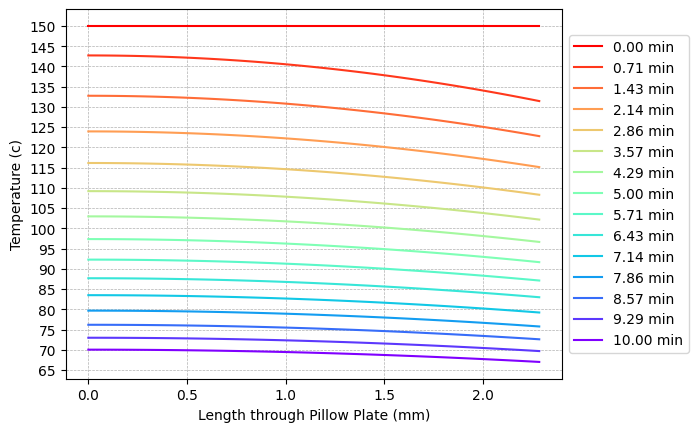

In [347]:
#Do the graphing

def get_elements_with_indices(arr):
    n = len(arr)
    if n <= 10:
        return [[i, arr[i]] for i in range(n)]
    else:
        indices = np.linspace(0, n-1 , 15, dtype=int)
        return [[i, arr[i]] for i in indices]

time_sample = get_elements_with_indices(time_nodes)
temperature_sample = [temperature_array[index].tolist() for index, _ in time_sample]

colors = plt.cm.rainbow_r(np.linspace(0, 1, 15))

for i,t in enumerate(temperature_sample):

    plt.plot(length_nodes*1000, t, c=colors[i], label=f"{time_sample[i][1]/60:.2f}" + " min")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Length through Pillow Plate (mm)')
plt.ylabel('Temperature (c)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
#plt.ylim(bottom=enclosure_temperature_c*3)
plt.show()


In [348]:
#Properties
def HT_properties(t):
    conductivity = -9*(t-273)*10**-5 + 0.1176
    density = -0.7387*(t-273) + 1032.2
    specific_heat = 0.0027*(t-273) + 1.6658

    return {
        'conductivity': conductivity,
        'density': density,
        'specific_heat': specific_heat

    }